# Wavelength Loss dependence using BraggExact

Here for the N2 configuration from Bird.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from scipy.optimize import newton

importing NGSolve-6.2.2203-56-g47f483033


# Initialize

In [2]:
n = 300
# wls = np.linspace(.4e-6, 1.6e-6, n+1)

wlLL = np.linspace(.4e-6, .48e-6, 40)[:-1]
wlL = np.linspace(.48e-6, .84e-6, 35)
wlC = np.linspace(.84e-6, .87e-6, 70)[1:-1]
wlR = np.linspace(.87e-6, 1.6e-6, 40)

wls = np.concatenate([wlLL, wlL, wlC, wlR])

betas1 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

In [3]:
# n_air = 1.00027717
# n_glass = 1.4388164768221814
# ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x : n_glass]
# ts = [15*1e-6, .42*1e-6, 15*1e-6, 15*1e-6]

# 6 tube fiber

In [4]:
ts = [15*1e-6, .42*1e-6, .832*15*1e-6, 10*1e-6]
n_air = 1.00027717
n_glass = 1.4388164768221814
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x : n_glass]
mats = ['air', 'glass', 'air', 'glass']
maxhs = [100 ,100, 100, 100]

In [5]:
attempt_max = 25
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(len(wls)) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, mats=mats, ns=ns, maxhs=maxhs, wl=wl, no_mesh=True)

    k_low = A.ks[0] * A.scale
    if wl <.8e-6:
        guess = np.array(.99995 * k_low)
    else:
        guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0
    attempts = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            if attempts >= attempt_max:
                beta = np.nan
                flag=False
            else:
                guess *= .999999
                reduce += 1
                print("scaling guess: " + str(reduce), flush=True)
                attempts += 1

    betas1[i] = beta
    

     --------------------  1/182: wavelength: 4e-07  --------------------     

Scaled beta:  (235.67222912443899-2.2070417191116014e-07j) . Residual of determinant:  5.3625547879018427e-11 


     --------------------  2/182: wavelength: 4.0205128205128204e-07  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (234.46966836739492-2.5525574574995153e-07j) . Residual of determinant:  4.052909318148126e-11 


     --------------------  3/182: wavelength: 4.041025641025641e-07  --------------------     

Scaled beta:  (233.27931228686714-2.9798064772516374e-07j) . Residual of determinant:  3.041352234584471e-11 


     --------------------  4/182: wavelength: 4.061538461538461e-07  --------------------     

Scaled beta:  (232.1009752245572-3.515302856108613e-07j) . Residual of determinant:  5.9386440150997e-11 


     --------------------  5/182: wavelength: 4.082051282051282e-07  --------------------     

scaling guess: 1
Scaled beta:  (230.93447502520283-4.196

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (198.08286091799906-3.8374300505441627e-07j) . Residual of determinant:  1.143537870213474e-11 


     --------------------  39/182: wavelength: 4.779487179487179e-07  --------------------     

scaling guess: 1
Scaled beta:  (197.23257999332228-3.6216598951115736e-07j) . Residual of determinant:  6.569213520944497e-11 


     --------------------  40/182: wavelength: 4.8e-07  --------------------     

scaling guess: 1
Scaled beta:  (196.38956697741733-3.4330575883625555e-07j) . Residual of determinant:  6.687776108594356e-11 


     --------------------  41/182: wavelength: 4.905882352941176e-07  --------------------     

Scaled beta:  (192.15024649209087-2.7597228603541067e-07j) . Residual of determinant:  4.661288434801363e-12 


     --------------------  42/182: wavelength: 5.011764705882352e-07  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (188.0900512315202-2.3890190

Scaled beta:  (112.14122142767471-0.00010815257308814102j) . Residual of determinant:  1.3012865668538218e-13 


     --------------------  76/182: wavelength: 8.408695652173913e-07  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
Scaled beta:  (112.08313000275801-0.00011125996227759452j) . Residual of determinant:  4.743611149901636e-14 


     --------------------  77/182: wavelength: 8.41304347826087e-07  --------------------     

scaling guess: 1
Scaled beta:  (112.02509700676994-0.00011447362296575453j) . Residual of determinant:  5.787143211970813e-14 


     --------------------  78/182: wavelength: 8.417391304347826e-07  --------------------     

Scaled beta:  (111.96712231475298-0.0001177972570333977j) . Residual of determinant:  1.1807682531126543e-13 


     --------------------  79/182: wavelength: 8.421739130434783e-07  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta

scaling guess: 1
Scaled beta:  (110.34031388309667-0.00020204985773726404j) . Residual of determinant:  2.3716270148645186e-13 


     --------------------  108/182: wavelength: 8.547826086956522e-07  --------------------     

scaling guess: 1
Scaled beta:  (110.28325672761709-0.00020679663810337955j) . Residual of determinant:  1.8160026614276095e-13 


     --------------------  109/182: wavelength: 8.552173913043478e-07  --------------------     

scaling guess: 1
Scaled beta:  (110.22625729408334-0.00021162990435512018j) . Residual of determinant:  4.024155154497406e-14 


     --------------------  110/182: wavelength: 8.556521739130435e-07  --------------------     

scaling guess: 1
Scaled beta:  (110.16931469159377-0.0002165624912345593j) . Residual of determinant:  3.09502474098323e-14 


     --------------------  111/182: wavelength: 8.560869565217391e-07  --------------------     

Scaled beta:  (110.11242808217659-0.0002216091920656622j) . Residual of determinant:  1.7354

scaling guess: 1
scaling guess: 2
Scaled beta:  (108.57058635724867-0.0001172971804928076j) . Residual of determinant:  2.9477729209301277e-13 


     --------------------  140/182: wavelength: 8.686956521739131e-07  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (108.51572395557953-0.00011745541773123116j) . Residual of determinant:  4.495219662394757e-14 


     --------------------  141/182: wavelength: 8.691304347826087e-07  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (108.4609382674376-0.00011747632706217782j) . Residual of determinant:  1.4680879786154205e-13 


     --------------------  142/182: wavelength: 8.695652173913044e-07  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
Scaled beta:  (108.40622788967349-0.00011736849

In [6]:
# Formula for loss spikes from article

ms1 = np.arange(1,3,1)

n1 = A.ns[0]  # Inner (core) index
n2 = A.ns[1]  # Cladding index

d1 = ts[1]

ls1 = (2 * n1 * d1 / ms1 * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver


<IPython.core.display.Javascript object>


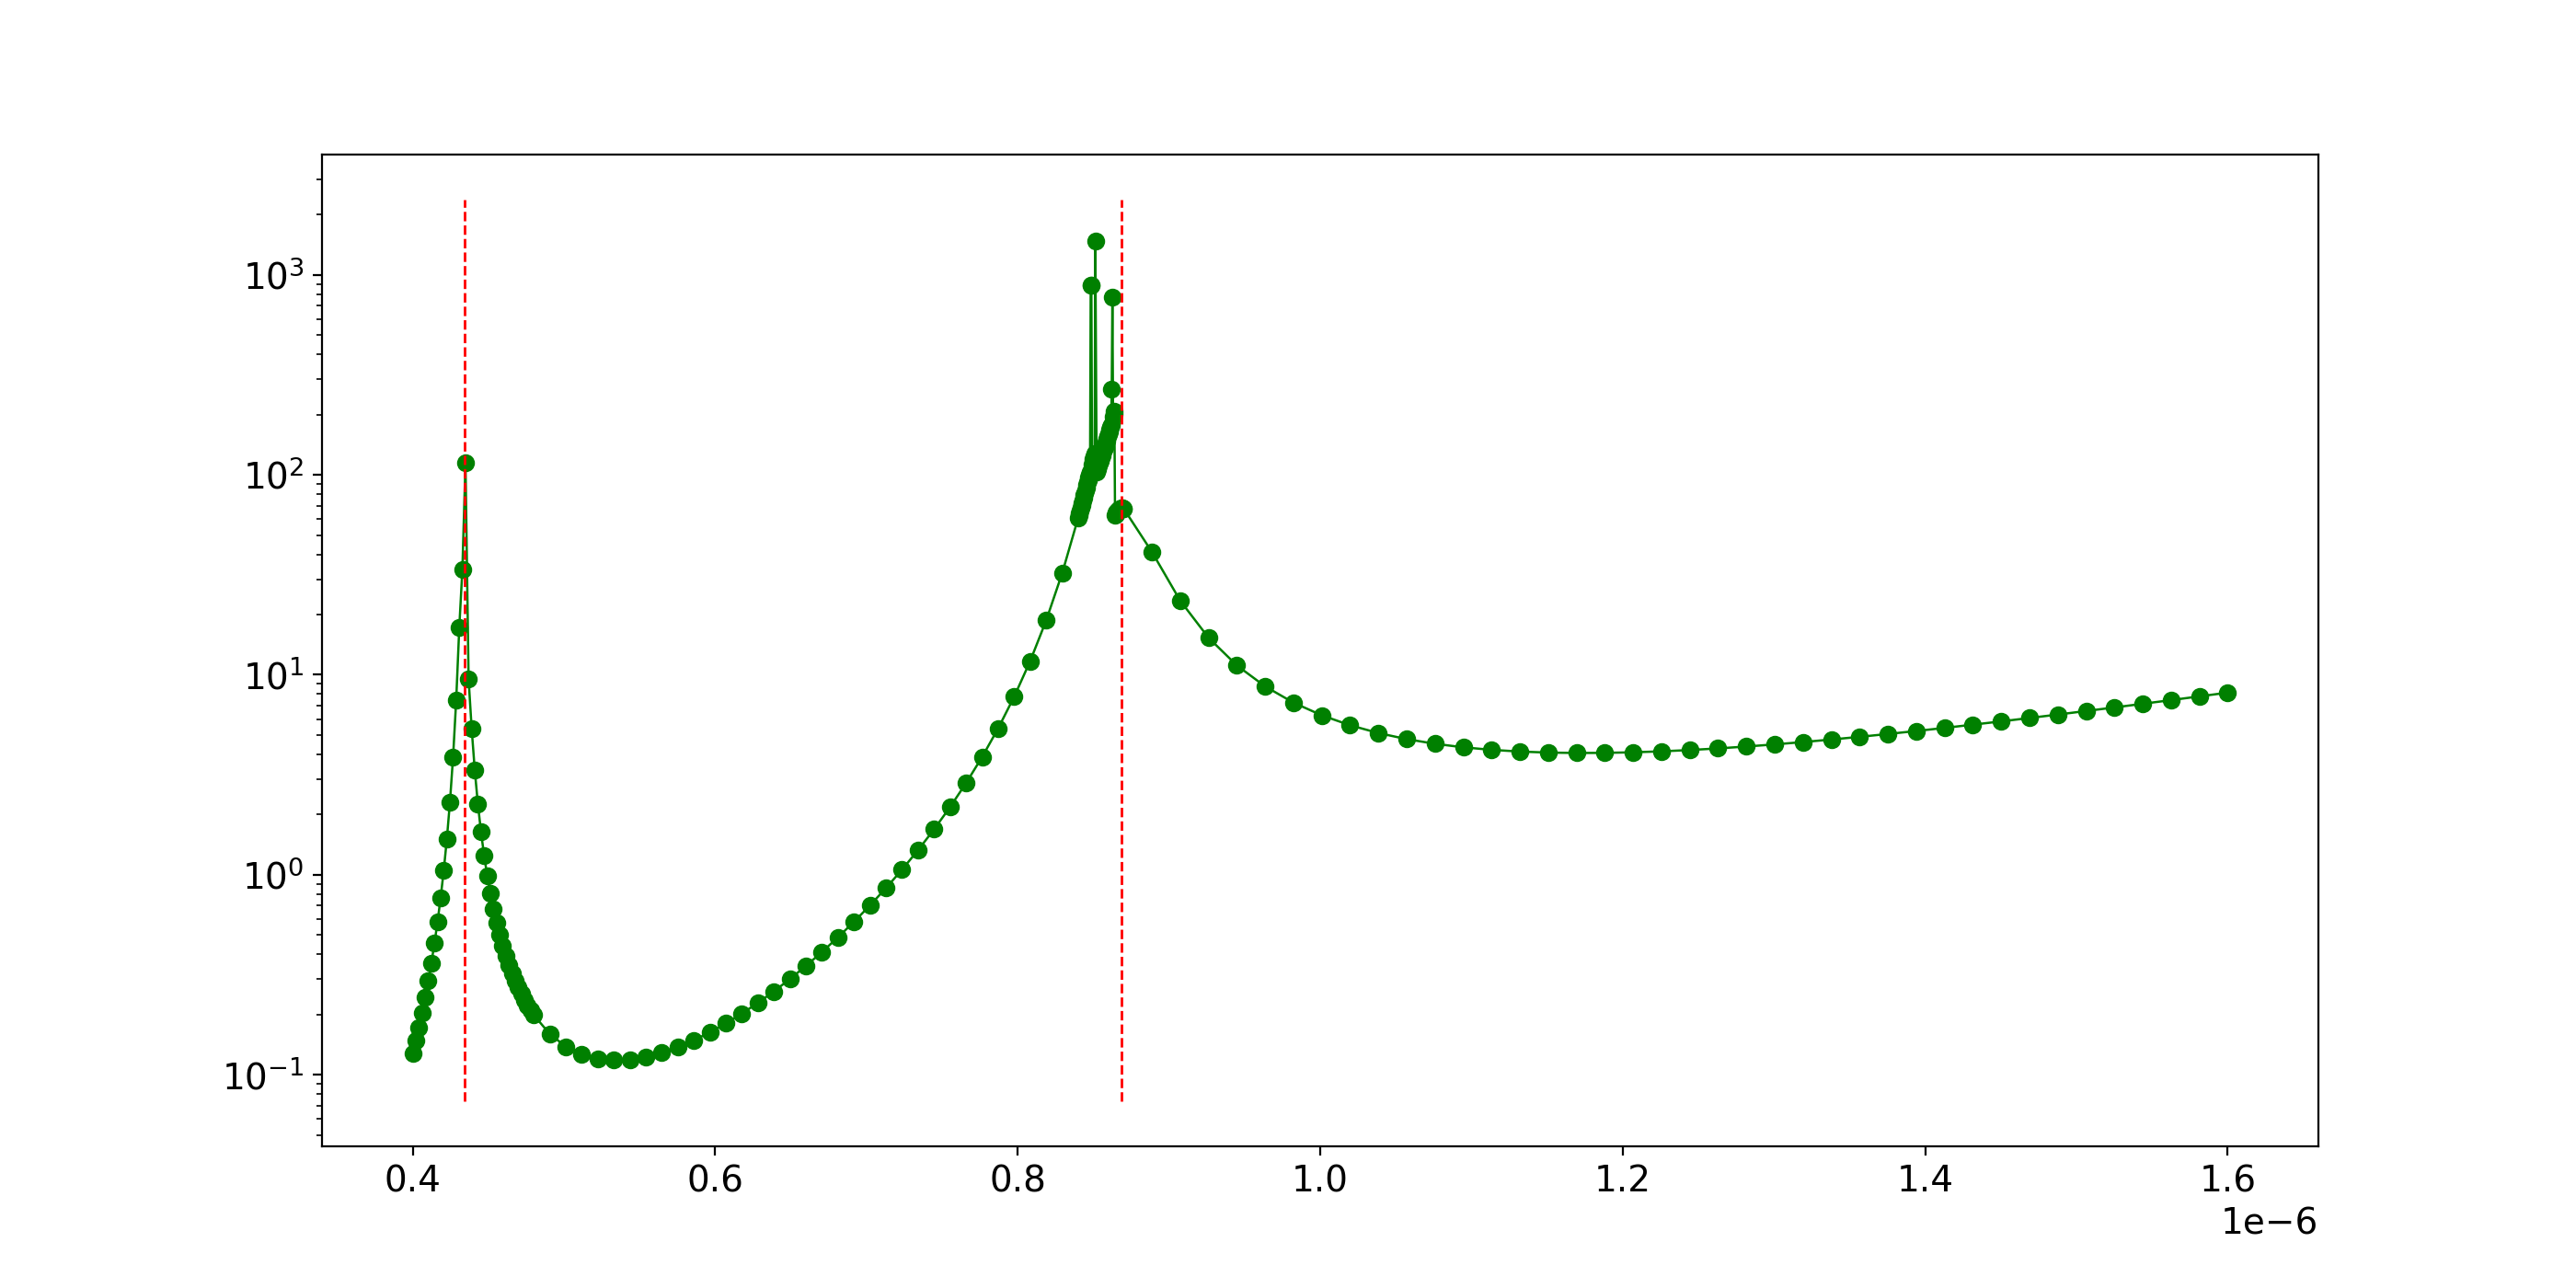

In [11]:
%matplotlib notebook
plt.figure(figsize=(14,7))

CL = -20 * betas1.imag/A.scale / np.log(10)
msk = np.where(CL>0)
plt.plot(wls[msk], CL[msk], color='green', marker='o',linewidth=.9)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.yscale('log')
m, M = plt.ylim()
for l in ls1:
    plt.plot([l,l], [m, M], color='red', linewidth=1, linestyle='--')


Save data for pgfplots

In [12]:
import os
paper_path = os.path.relpath(os.path.expanduser('~/papers/outer_materials/\
figures/data/bragg/6tube'))

both = np.column_stack((wls[msk]*1e6, CL[msk]))
np.savetxt(paper_path + '/analytic.dat', both, fmt='%.8f')

# 8 tube fiber


In [8]:
n = 400
wls = np.linspace(2.4e-6, 13.6e-6, n+1)

# wlLL = np.linspace(.4e-6, .48e-6, 40)[:-1]
# wlL = np.linspace(.48e-6, .84e-6, 35)
# wlC = np.linspace(.84e-6, .87e-6, 70)[1:-1]
# wlR = np.linspace(.87e-6, 1.6e-6, 40)

# wls = np.concatenate([wlLL, wlL, wlC, wlR])

betas2 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

In [9]:
ts = [59.5*1e-6, 6*1e-6, .832*59.5*1e-6, 30.6*1e-6,10e-6]
n_air = 1.00027717
n_glass = 1.4388164768221814
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x : n_glass, lambda x:n_air]
mats = ['air', 'glass', 'air', 'glass', 'air']
maxhs = [100 ,100, 100, 100, 100]

In [10]:
attempt_max = 25
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(len(wls)) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, mats=mats, ns=ns, maxhs=maxhs, wl=wl, no_mesh=True)

    k_low = A.ks[0] * A.scale
    if wl <.8e-6:
        guess = np.array(.99995 * k_low)
    else:
        guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0
    attempts = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            if attempts >= attempt_max:
                beta = np.nan
                flag=False
            else:
                guess *= .999999
                reduce += 1
                print("scaling guess: " + str(reduce), flush=True)
                attempts += 1

    betas2[i] = beta
    

     --------------------  1/401: wavelength: 2.4e-06  --------------------     

scaling guess: 1
Scaled beta:  (39.27596533134702-9.997267831977976e-09j) . Residual of determinant:  2.689604555459362e-07 


     --------------------  2/401: wavelength: 2.428e-06  --------------------     

Scaled beta:  (38.82281715996358-3.8316319618097547e-07j) . Residual of determinant:  9.477946409501233e-10 


     --------------------  3/401: wavelength: 2.456e-06  --------------------     

Scaled beta:  (38.37981538801312-2.51857795578957e-07j) . Residual of determinant:  6.4588382784240234e-09 


     --------------------  4/401: wavelength: 2.484e-06  --------------------     

scaling guess: 1
Scaled beta:  (37.945094355446706-3.5489788094023406e-06j) . Residual of determinant:  1.997466758453652e-11 


     --------------------  5/401: wavelength: 2.512e-06  --------------------     

scaling guess: 1
Scaled beta:  (37.52501752723182-1.4684028216897955e-07j) . Residual of determinant:  2.

scaling guess: 1
Scaled beta:  (26.355962070476462-2.4714238734669046e-08j) . Residual of determinant:  4.4270334954187485e-08 


     --------------------  44/401: wavelength: 3.6039999999999997e-06  --------------------     

Scaled beta:  (26.151072174763726-1.7469921170557474e-08j) . Residual of determinant:  1.3178704078555135e-07 


     --------------------  45/401: wavelength: 3.632e-06  --------------------     

Scaled beta:  (25.949339471093715-1.8755882191708806e-08j) . Residual of determinant:  4.665263681878382e-08 


     --------------------  46/401: wavelength: 3.66e-06  --------------------     

Scaled beta:  (25.75069111169891-2.983885308707275e-08j) . Residual of determinant:  8.147740504632845e-08 


     --------------------  47/401: wavelength: 3.688e-06  --------------------     

Scaled beta:  (25.555056288808423-8.31530623806027e-08j) . Residual of determinant:  2.3049531493851858e-09 


     --------------------  48/401: wavelength: 3.716e-06  --------------

Scaled beta:  (19.947314692479978-7.424541904179513e-08j) . Residual of determinant:  2.5342334800396088e-08 


     --------------------  85/401: wavelength: 4.7519999999999996e-06  --------------------     

Scaled beta:  (19.829654092099293-9.152058892664435e-08j) . Residual of determinant:  2.3079714952131012e-08 


     --------------------  86/401: wavelength: 4.78e-06  --------------------     

Scaled beta:  (19.713371421892276-1.332217924258419e-07j) . Residual of determinant:  5.187413677464552e-09 


     --------------------  87/401: wavelength: 4.808e-06  --------------------     

Scaled beta:  (19.598442325343054-2.4537171800883473e-07j) . Residual of determinant:  3.1738035749699537e-09 


     --------------------  88/401: wavelength: 4.836e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (19.484842566233244-6.950387488927804e-07j) . Residual of determinant:  1.618953403932135e-09 


     --------------------  89/401: wav

scaling guess: 1
Scaled beta:  (16.11914096441646-6.752614042373467e-06j) . Residual of determinant:  5.722250831118731e-11 


     --------------------  125/401: wavelength: 5.872000000000001e-06  --------------------     

Scaled beta:  (16.042028874731834-4.967483620077795e-06j) . Residual of determinant:  1.6315107187554972e-10 


     --------------------  126/401: wavelength: 5.9e-06  --------------------     

Scaled beta:  (15.965629126838682-4.282346817415056e-06j) . Residual of determinant:  2.7017910791407248e-11 


     --------------------  127/401: wavelength: 5.928e-06  --------------------     

Scaled beta:  (15.889925343545595-4.139744542641544e-06j) . Residual of determinant:  5.337745342469058e-11 


     --------------------  128/401: wavelength: 5.956e-06  --------------------     

Scaled beta:  (15.814900492456037-4.386878303668562e-06j) . Residual of determinant:  9.868392424825181e-12 


     --------------------  129/401: wavelength: 5.984000000000001e-06  --

Scaled beta:  (13.524631663101289-7.366268198240053e-06j) . Residual of determinant:  3.751770071610539e-11 


     --------------------  165/401: wavelength: 6.992e-06  --------------------     

Scaled beta:  (13.470322646153924-1.5000432182288536e-05j) . Residual of determinant:  7.258225486280952e-11 


     --------------------  166/401: wavelength: 7.0200000000000006e-06  --------------------     

Scaled beta:  (13.416440308859412-4.2919510683294155e-05j) . Residual of determinant:  2.535261512035424e-11 


     --------------------  167/401: wavelength: 7.048e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (13.358462669898447-0.00764353193697026j) . Residual of determinant:  4.469377060424234e-14 


     --------------------  168/401: wavelength: 7.0760000000000005e-06  --------------------     

Scaled beta:  (13.310109636408288-3.856710614804245e-05j) . Residual of determinant:  1.4160416146170762e-11 


     ------------------

Scaled beta:  (11.686799099571214-5.785173086122821e-06j) . Residual of determinant:  2.2467752481845886e-10 


     --------------------  204/401: wavelength: 8.084e-06  --------------------     

Scaled beta:  (11.646192465144317-4.117030863025359e-06j) . Residual of determinant:  2.6701163642026594e-10 


     --------------------  205/401: wavelength: 8.112e-06  --------------------     

Scaled beta:  (11.605866565104169-3.1309039523312758e-06j) . Residual of determinant:  1.9526742828598793e-10 


     --------------------  206/401: wavelength: 8.14e-06  --------------------     

Scaled beta:  (11.565818147984716-2.503471317006242e-06j) . Residual of determinant:  2.1356247216817842e-10 


     --------------------  207/401: wavelength: 8.168e-06  --------------------     

Scaled beta:  (11.526044148342693-2.0824978350695684e-06j) . Residual of determinant:  3.692578065858539e-10 


     --------------------  208/401: wavelength: 8.196e-06  --------------------     

Scaled bet

Scaled beta:  (10.224207432527804-2.179089215344523e-05j) . Residual of determinant:  3.1441618824979395e-11 


     --------------------  245/401: wavelength: 9.232e-06  --------------------     

Scaled beta:  (10.193054855821742-1.6219775378723394e-05j) . Residual of determinant:  7.862143138153745e-11 


     --------------------  246/401: wavelength: 9.26e-06  --------------------     

Scaled beta:  (10.162091407245242-1.2706266949499476e-05j) . Residual of determinant:  1.4446848840748813e-11 


     --------------------  247/401: wavelength: 9.288e-06  --------------------     

Scaled beta:  (10.13131489482412-1.0361970153532944e-05j) . Residual of determinant:  4.708546636991556e-11 


     --------------------  248/401: wavelength: 9.316e-06  --------------------     

Scaled beta:  (10.100723288186462-8.728157632786347e-06j) . Residual of determinant:  7.745580702796656e-12 


     --------------------  249/401: wavelength: 9.344e-06  --------------------     

Scaled beta:

Scaled beta:  (9.059629677460807-7.27937100052368e-05j) . Residual of determinant:  7.710627121727334e-12 


     --------------------  287/401: wavelength: 1.0408e-05  --------------------     

Scaled beta:  (9.035049743467358-9.649490545181006e-05j) . Residual of determinant:  2.2028436363677769e-13 


     --------------------  288/401: wavelength: 1.0436e-05  --------------------     

Scaled beta:  (9.01059288334525-0.000131577833569139j) . Residual of determinant:  2.3397864876492686e-12 


     --------------------  289/401: wavelength: 1.0464e-05  --------------------     

Scaled beta:  (8.98625799920443-0.00018505188816119884j) . Residual of determinant:  1.2396183734182943e-12 


     --------------------  290/401: wavelength: 1.0492e-05  --------------------     

Scaled beta:  (8.962047292969586-0.00026845044394661536j) . Residual of determinant:  1.2125860550862321e-12 


     --------------------  291/401: wavelength: 1.0520000000000001e-05  --------------------     

s

Scaled beta:  (8.209702458075627-7.707574923781635e-05j) . Residual of determinant:  3.181157042282699e-12 


     --------------------  325/401: wavelength: 1.1472000000000001e-05  --------------------     

Scaled beta:  (8.189367888213855-8.050151599316482e-05j) . Residual of determinant:  8.94550447015815e-14 


     --------------------  326/401: wavelength: 1.1500000000000002e-05  --------------------     

Scaled beta:  (8.169125699164542-8.43883985478752e-05j) . Residual of determinant:  1.3986201724115605e-12 


     --------------------  327/401: wavelength: 1.1528000000000002e-05  --------------------     

scaling guess: 1
Scaled beta:  (8.148974953856-8.877790134830052e-05j) . Residual of determinant:  3.6155372948951718e-12 


     --------------------  328/401: wavelength: 1.1555999999999999e-05  --------------------     

Scaled beta:  (8.128914715062182-9.371871993655091e-05j) . Residual of determinant:  2.0457045490973196e-12 


     --------------------  329/401: wav

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
Scaled beta:  (7.491752597804646-0.0013616369567721887j) . Residual of determinant:  2.6575112419033987e-13 


     --------------------  365/401: wavelength: 1.2592e-05  --------------------     

Scaled beta:  (7.485957384349407-0.0005899164867974805j) . Residual of determinant:  3.780477331268201e-11 


     --------------------  366/401: wavelength: 1.2620000000000001e-05  --------------------     

scaling guess: 1
Scaled beta:  (7.468620811728942-0.0025305375832940283j) . Residual of determinant:  1.9329676528417183e-12 


     --------------------  367/401: wavelength: 1.2648000000000002e-05  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (7.449558985237327-0.009026267895094626j) . Residual of determinant:  1.2318905057818293e-13 


     --------------------  368/401:

In [5]:
# Formula for loss spikes from article

ms1 = np.arange(1,6,1)

n1 = A.ns[0]  # Inner (core) index
n2 = A.ns[1]  # Cladding index

d1 = ts[1]

ls1 = (2 * n1 * d1 / ms1 * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver


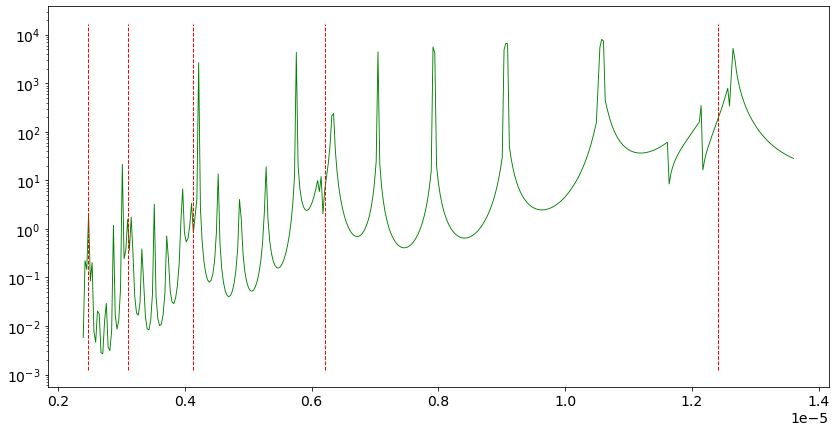

In [11]:
%matplotlib inline
plt.figure(figsize=(14,7))

CL2 = -20 * betas2.imag/A.scale / np.log(10)
msk = np.where(CL2>0)
plt.plot(wls[msk], CL2[msk], color='green', linewidth=.9)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.yscale('log')
m, M = plt.ylim()
for l in ls1:
    plt.plot([l,l], [m, M], color='red', linewidth=1, linestyle='--')


Save data for pgfplots

In [12]:
import os
paper_path = os.path.relpath(os.path.expanduser('~/papers/outer_materials/\
figures/data/bragg/8tube'))

both = np.column_stack((wls[msk]*1e6, CL2[msk]))
np.savetxt(paper_path + '/n3.dat', both, fmt='%.8f')